# **Factors Contributing to Rising Suicide Rates**

Mental Health Struggles: Feelings like depression and anxiety, made worse by how people judge and the difficulty in getting help, can push someone towards suicide.

Tough Times and Money Worries: When people are struggling financially or can't find work, it adds stress and makes them feel like there's no hope.

Feeling Alone: Our busy lives and changes in families can make people feel isolated. Loneliness can make it easier to think about suicide.

Bad Experiences: Going through tough events like losing someone, being abused, or dealing with a long-term illness can really hurt someone's mental health and make them think about suicide.

Access to Ways to Hurt Themselves: Having easy access to things like guns or pills can make it more likely for someone to act on thoughts of suicide, especially if they're feeling desperate.

Societal Pressure and Attitudes: The way society looks at mental health and suicide can stop people from asking for help when they really need it.

Media Influence: When the media talks a lot about suicide, especially in a dramatic way, it can make other people who are struggling think about it more too.

Not Enough Help Available: Many people don't know much about mental health or where to get help. Even when they do, there might not be enough resources to help everyone who needs it.

To lower suicide rates, we need to spread awareness about mental health, change how we talk about suicide, and make sure everyone has access to support and treatment when they need it. It's a big job that needs everyone's help, including governments, doctors, communities, and individuals.

# **Here's a Data Analysis of suicides in India between 2001-2012.**

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.options.display.max_columns= 30
pd.options.display.max_rows= 30
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", None)
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from subprocess import check_output
df = pd.read_csv('/kaggle/input/suicides-in-india-20012012/Suicides in India 2001-2012.csv')
eduDf=df[df['Type_code']== 'Education_status']
causesDf= df[df['Type_code']=='Causes']
meansDf= df[df['Type_code']== 'Means_adopted']
profDf=df[df['Type_code']=='Professional_profile']
socialDf=df[df['Type_code']=='Social_status']


In [2]:
df.shape # size of df data frame
# shape provides the size or dimension of the data
#the output shows (row,column)

(237519, 7)

In [3]:
df.info() # to find any null values and datatype of the field

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [4]:
df.describe() #to find the statistics like count, mean, standard deviation

,Year,Total
count,237519.000000,237519.000000
mean,2006.500448,55.034477
std,3.452240,792.749038
min,2001.000000,0.000000
25%,2004.000000,0.000000
50%,2007.000000,0.000000
75%,2010.000000,6.000000
max,2012.000000,63343.000000


In [5]:
causesDf = df[df['Type_code']=='Causes']
causesDf.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [6]:
print ('Date Collected from which states:',df['State'].unique())

Date Collected from which states: ['A & N Islands' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar'
 'Chandigarh' 'Chhattisgarh' 'D & N Haveli' 'Daman & Diu' 'Delhi (Ut)'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir'
 'Jharkhand' 'Karnataka' 'Kerala' 'Lakshadweep' 'Madhya Pradesh'
 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha'
 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu'
 'Total (All India)' 'Total (States)' 'Total (Uts)' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']


In [7]:
causesDf = df[df['Type_code']== 'Causes']
causesDf.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [8]:
meansDf = df[df['Type_code'] == 'Means_adopted']
meansDf.head()






,State,Year,Type_code,Type,Gender,Age_group,Total
276,A & N Islands,2001,Means_adopted,By Consuming Insecticides,Female,0-14,0
277,A & N Islands,2001,Means_adopted,By Hanging,Female,0-14,2
278,A & N Islands,2001,Means_adopted,By Jumping from (Other sites),Female,0-14,0
279,A & N Islands,2001,Means_adopted,By touching electric wires,Female,0-14,0
280,A & N Islands,2001,Means_adopted,By Machine,Female,0-14,0


In [9]:
 df.State.value_counts()

State
Madhya Pradesh       6792
Maharashtra          6792
Karnataka            6792
Odisha               6791
Andhra Pradesh       6791
Rajasthan            6791
Bihar                6790
Chhattisgarh         6790
Haryana              6790
Kerala               6788
Uttar Pradesh        6787
Assam                6786
Tamil Nadu           6786
Gujarat              6786
Jharkhand            6785
Tripura              6782
Delhi (Ut)           6782
West Bengal          6780
Punjab               6779
Himachal Pradesh     6774
Jammu & Kashmir      6761
Goa                  6759
Uttarakhand          6758
Sikkim               6742
Mizoram              6737
Meghalaya            6733
Puducherry           6730
Chandigarh           6717
A & N Islands        6712
Daman & Diu          6710
Arunachal Pradesh    6707
Nagaland             6705
D & N Haveli         6704
Manipur              6700
Lakshadweep          6674
Total (All India)     312
Total (States)        312
Total (Uts)           312
Name: 

In [10]:
df= df.drop(df[(df.State== 'Total (Uts)') | (df.State == 'Total (All India)') | (df.State == 'Total (States)')].index)

In [11]:
df.State.value_counts()

State
Karnataka            6792
Madhya Pradesh       6792
Maharashtra          6792
Andhra Pradesh       6791
Odisha               6791
Rajasthan            6791
Chhattisgarh         6790
Bihar                6790
Haryana              6790
Kerala               6788
Uttar Pradesh        6787
Tamil Nadu           6786
Gujarat              6786
Assam                6786
Jharkhand            6785
Tripura              6782
Delhi (Ut)           6782
West Bengal          6780
Punjab               6779
Himachal Pradesh     6774
Jammu & Kashmir      6761
Goa                  6759
Uttarakhand          6758
Sikkim               6742
Mizoram              6737
Meghalaya            6733
Puducherry           6730
Chandigarh           6717
A & N Islands        6712
Daman & Diu          6710
Arunachal Pradesh    6707
Nagaland             6705
D & N Haveli         6704
Manipur              6700
Lakshadweep          6674
Name: count, dtype: int64

#  Total No. of suicides in each States (2001-2012)

In [12]:

state=df.groupby('State')['Total'].sum().to_frame()
state.sort_values(by= 'Total', ascending=True, inplace=True)
state.style.background_gradient(subset='Total', cmap='Blues')


,Total
State,
Lakshadweep,50
Daman & Diu,1391
Nagaland,1728
Manipur,2102
D & N Haveli,3430
Mizoram,4154
Chandigarh,5164
Meghalaya,5415
Arunachal Pradesh,6633


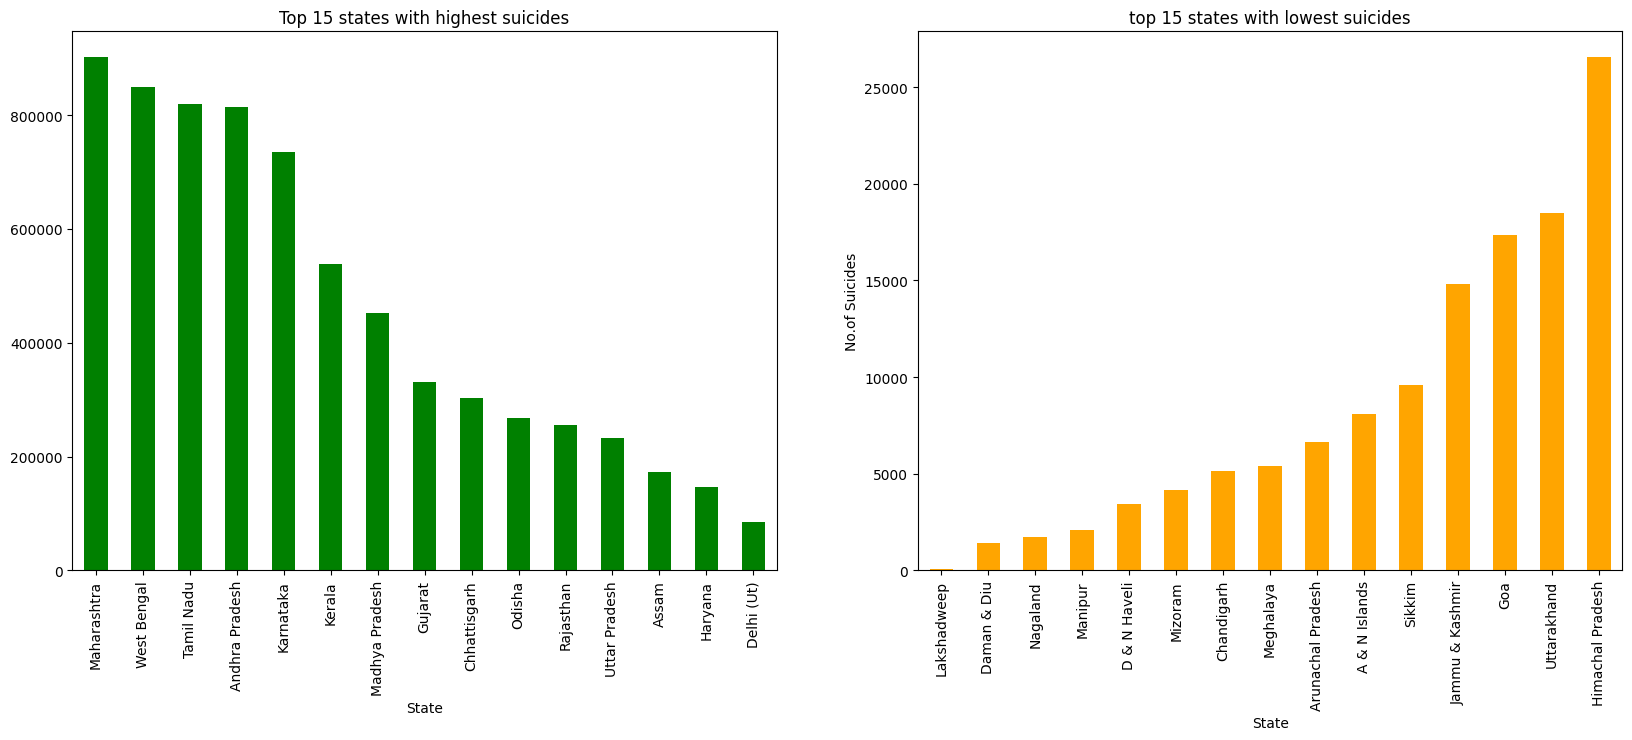

In [13]:
f, ax = plt.subplots(1,2, figsize=(20,7))
df.groupby("State")["Total"].sum().sort_values(ascending = False)[:15].plot(kind= "bar",color ="green", ax= ax[0])
plt.ylabel("No. of Suicides")
df.groupby("State")["Total"].sum().sort_values(ascending = True) [:15].plot(kind ="bar", color= "orange", ax=ax[1])
plt.ylabel("No.of Suicides")
ax[0].title.set_text('Top 15 states with highest suicides')
ax[1].title.set_text('top 15 states with lowest suicides')


# Suicide count by Gender

In [14]:

gender_suicide_counts=df.groupby('Gender')['Total'].sum().to_frame()

gender_suicide_counts.style.background_gradient(subset='Total', cmap='OrRd')




,Total
Gender,
Female,2606922
Male,4641088


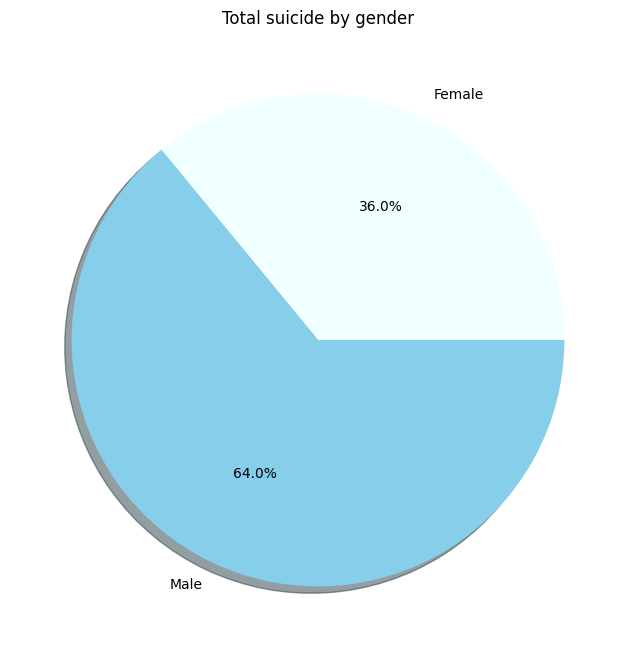

In [15]:
plt.figure(figsize=(8,8))
plt.pie(gender_suicide_counts['Total'], labels=gender_suicide_counts.index, autopct='%1.1f%%',colors=['azure','skyblue'], shadow= True)
plt.title('Total suicide by gender')

plt.show()


In [16]:
eduDf= eduDf[['Type','Gender','Total']]
edSort = eduDf.groupby(['Type','Gender'],as_index= False).sum().sort_values('Total',ascending=False)

Bar Graph of sucides based on Causes.

In [17]:
causesDf= causesDf[['Type','Gender','Total']]
causes_Sort= causesDf.groupby(['Type','Gender'], as_index=False).sum().sort_values(by ='Total', ascending=False)


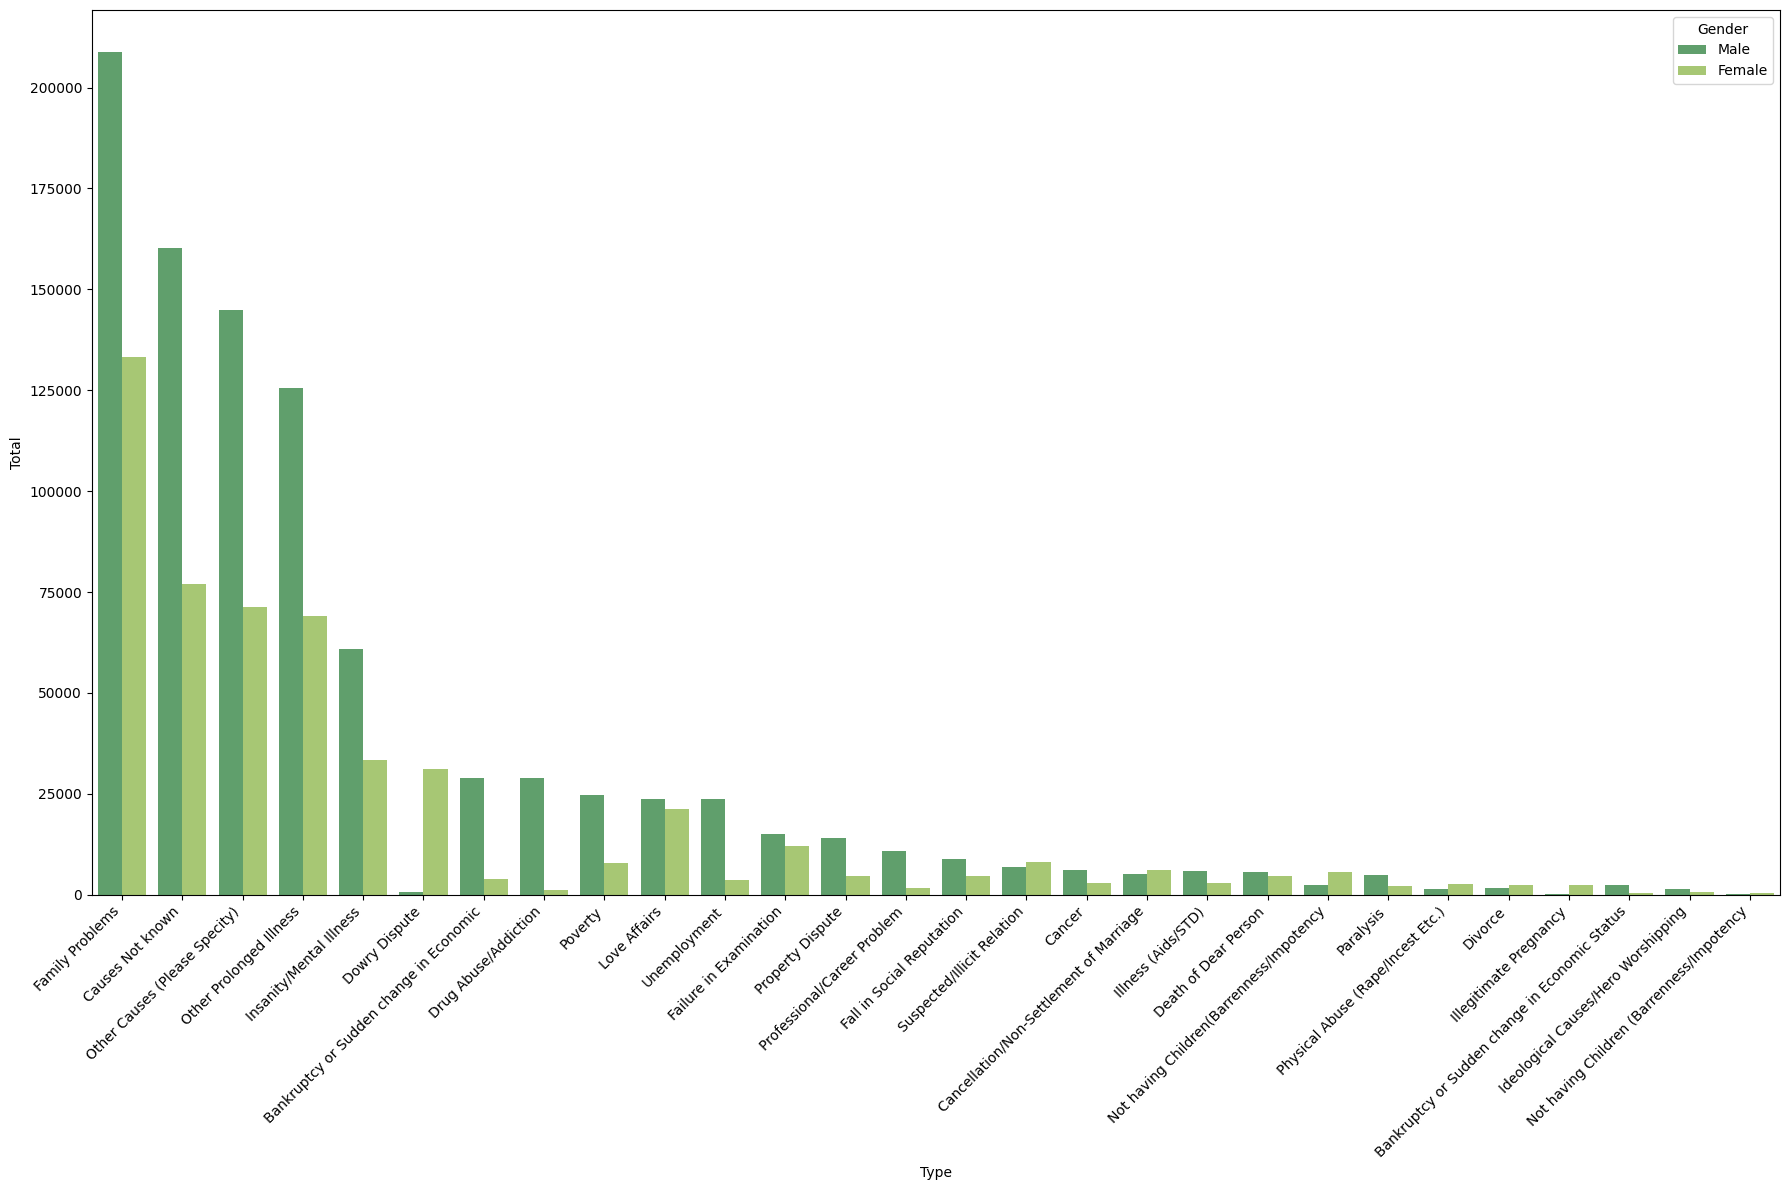

In [18]:
plt.figure(figsize=(18,12))
sns.barplot(data= causes_Sort, x='Type', y= 'Total', hue='Gender',palette='summer')
plt.xticks(rotation= 45, ha='right')
plt.tight_layout()

# **No. of Male & Female suicdes in each state**.

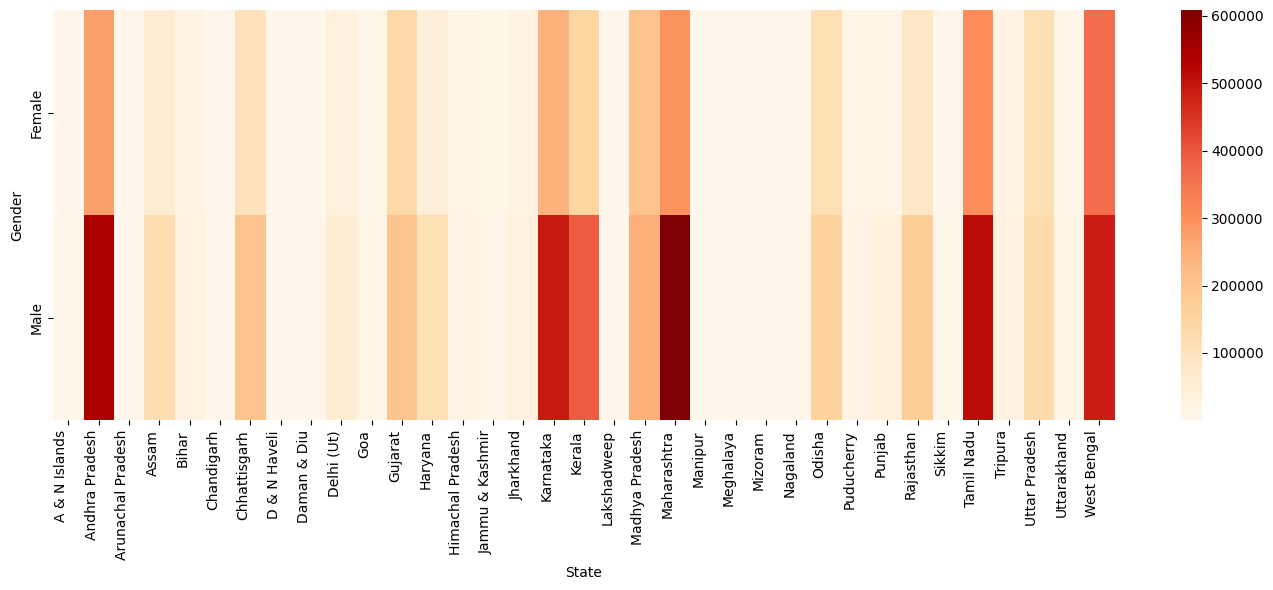

In [19]:
causesDf= df[df['Type_code']=='Causes']
group_year_wise= df.groupby(['State','Gender'],as_index=False).sum()
group_year_wisePvt = group_year_wise.pivot(index='Gender', columns= 'State', values='Total')
plt.figure(figsize=(14,6))
plt.xticks(rotation=45,ha ='right')
sns.heatmap(group_year_wisePvt,cmap='OrRd')
plt.tight_layout()


# Total no. of suicdes per year

In [20]:
year=df.groupby('Year')['Total'].sum().to_frame()
state.sort_values(by= 'Total', ascending=True, inplace=True)
year.style.background_gradient(subset='Total',cmap='OrRd')

,Total
Year,
2001,542440
2002,551980
2003,554218
2004,568349
2005,569545
2006,590543
2007,613119
2008,625014
2009,635429


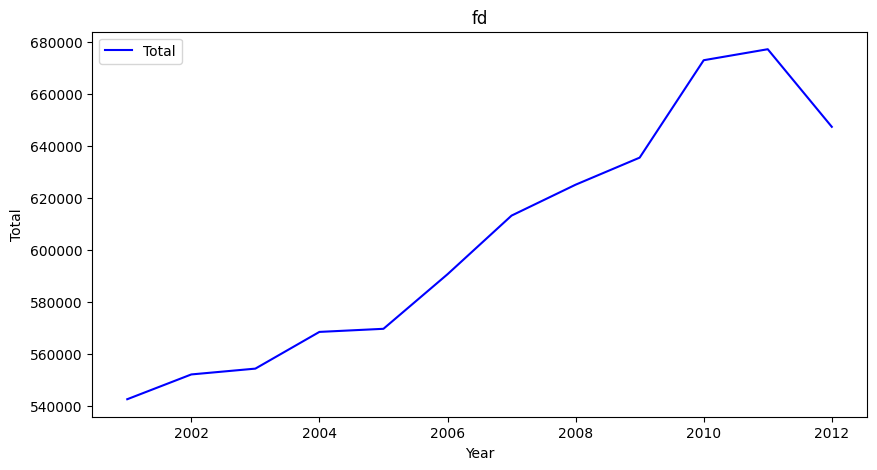

In [21]:

year.plot(kind='line', figsize=(10,5), color='blue')
plt.title('fd')
plt.xlabel('Year')
plt.ylabel('Total');

In [22]:
women=df[df['Gender']== 'Female']
women_year= women.groupby('State')['Total'].sum().to_frame()
women_year.rename(columns={'Total':'Female'}, inplace=True)




In [23]:
men=df[df['Gender']== 'Male']
men_year= men.groupby('State')['Total'].sum().to_frame()
men_year.rename(columns={'Total':'Male'}, inplace=True)




In [24]:
gender_year=men_year.join(women_year)
gender_year.style.background_gradient(cmap='OrRd', axis=0)


,Male,Female
State,,
A & N Islands,5359,2750
Andhra Pradesh,542120,271939
Arunachal Pradesh,4679,1954
Assam,117152,55124
Bihar,25960,20254
Chandigarh,3277,1887
Chhattisgarh,203780,98574
D & N Haveli,2030,1400
Daman & Diu,916,475


# No. of Female suicides per State (2001-2021)

In [25]:
female_year=gender_year.drop(columns='Male')

female_year.style.background_gradient(cmap='OrRd', axis=0)


,Female
State,
A & N Islands,2750
Andhra Pradesh,271939
Arunachal Pradesh,1954
Assam,55124
Bihar,20254
Chandigarh,1887
Chhattisgarh,98574
D & N Haveli,1400
Daman & Diu,475


# MAP REPRESENTATION

In [26]:
import geopandas as gpd
shp_gdf= gpd.read_file('/kaggle/input/india-gis-data/India States')
shp_gdf.set_index('st_nm', inplace =True)
shp_gdf.rename(index={'Andaman & Nicobar Island': 'A & N Islands','Arunanchal Pradesh': 'Arunachal Pradesh', 'Dadara & Nagar Havelli':'D & N Haveli','NCT of Delhi': 'Delhi (UT)'}, inplace=True)
shp_gdf.head()



,geometry
st_nm,
A & N Islands,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
Arunachal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


In [27]:
merged= shp_gdf.join(female_year.iloc[:,0])
merged.at['Telangana','Female']= merged.at['Andhra Pradesh','Female']
merged.head()

,geometry,Female
st_nm,,
A & N Islands,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",2750.0
Arunachal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",1954.0
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",55124.0
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",20254.0
Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",1887.0


Axes(0.125,0.148351;0.62x0.693299)


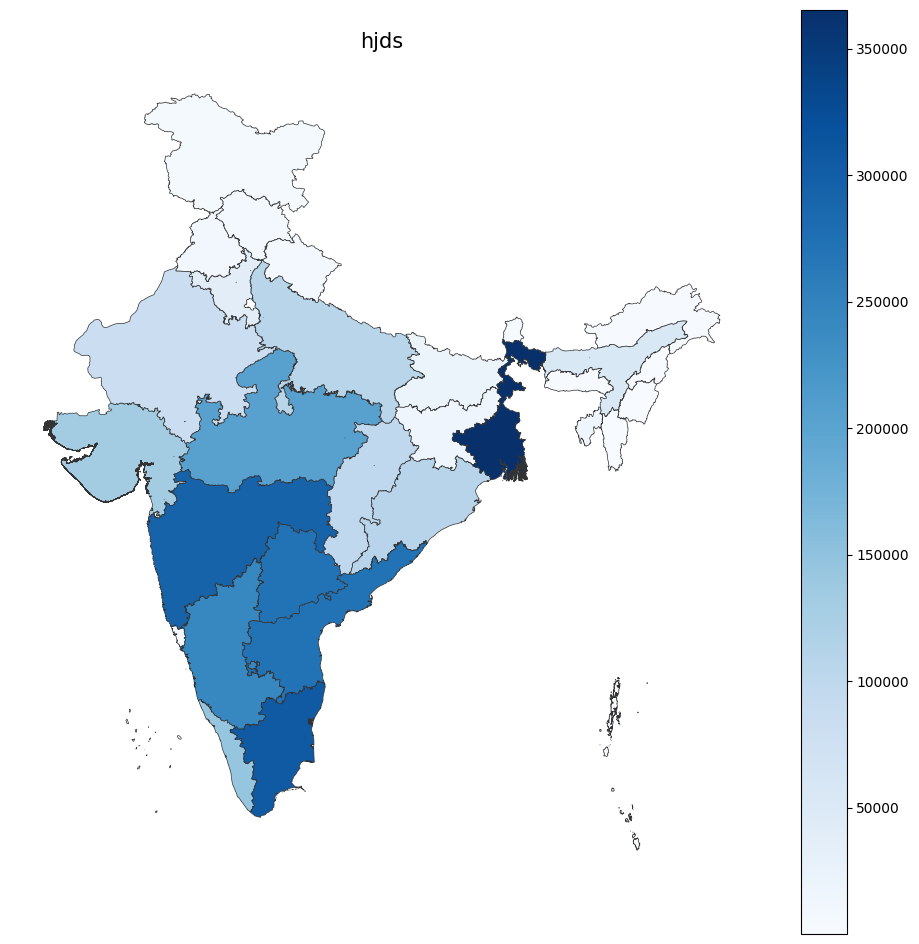

In [28]:
fig, ax = plt.subplots (1,figsize=(12,12))
ax.axis('off')
ax.set_title('hjds',
fontdict={'fontsize': '15','fontweight': '3'})
fig= merged.plot(column='Female',cmap='Blues', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)
print(fig)



**Thus its concluded that the maximum number of female suicides was in West Bengal.**

# Female suicide causes in West Bengal-

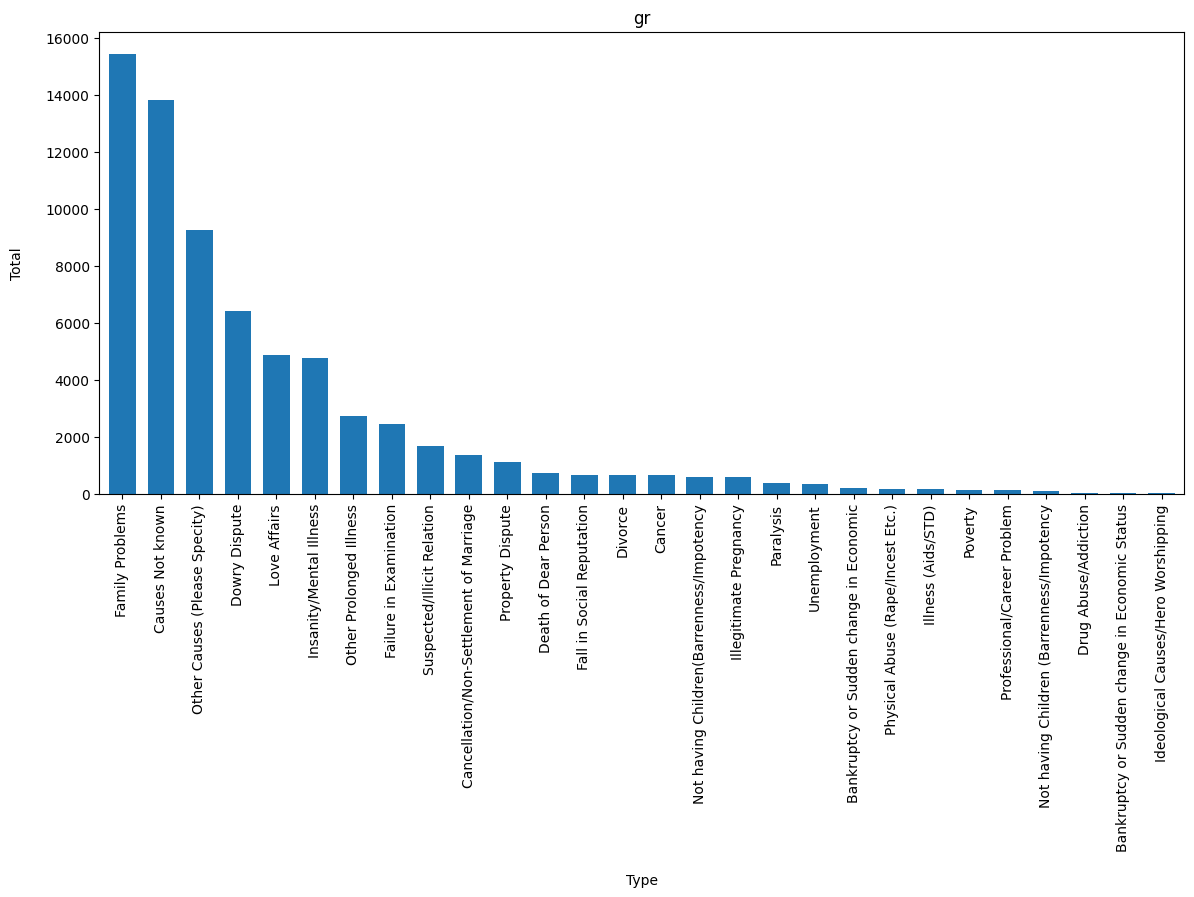

In [29]:
State1 = df[df['State']== 'West Bengal']

female= State1[State1['Gender']=='Female']
causes= female[female['Type_code']=='Causes']
female1= causes.drop(columns=['Year','Age_group','Type_code','Gender'])


causes= female1.groupby('Type').sum()['Total']
sort_causes= causes.sort_values(ascending=False)
causes_fig=sort_causes.plot(kind='bar', figsize=(14,6), title='gr',width=0.69)
causes_fig.set_xlabel('\nType')
causes_fig.set_ylabel('Total\n')
sns.set_style('whitegrid');


**We got the conclusion that the cause behind maximum female suicides in West Bengal is due to family problems.**

*The solution to addressing the high rates of female suicides in West Bengal due to family problems requires a multi-faceted approach:*

Awareness and Education: Promote awareness campaigns to challenge harmful gender norms, raise awareness about domestic violence and mental health issues, and encourage open dialogue within families.

Legal Protection and Support Services: Strengthen legal frameworks to protect women from domestic violence and dowry-related harassment, and ensure the availability of support services such as shelters, counseling, and legal aid.

Community Engagement: Engage community leaders, religious institutions, and local organizations to advocate for gender equality, promote healthy family dynamics, and provide support to women in distress.

Crisis Intervention and Mental Health Services: Enhance access to crisis intervention services, helplines, and mental health support for women experiencing family problems, ensuring culturally sensitive and gender-responsive care.

Empowerment Programs: Empower women with education, skills training, economic opportunities, and access to resources that enable them to assert their rights, make informed choices, and build resilience against familial pressures.

Early Intervention and Prevention: Implement early intervention programs in schools, workplaces, and healthcare settings to identify and address risk factors for family problems and provide timely support to individuals and families in crisis.

By addressing the root causes of family problems and empowering women with resources and support, we can create safer and more supportive environments that prevent suicides and promote the well-being of women in West Bengal and beyond.